In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [7]:
from sklearn.cross_validation import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
car_sales = pd.read_csv('D:/Analytics Labs(Data Science with Python)/Analytics Labs(Data Science with Python)/Advertising case study/Car_sales.csv')

In [9]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [10]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [11]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [12]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [13]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [14]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [15]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
__year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [16]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [17]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [18]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
__year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [19]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [20]:
# Missing Summary
def Missing_summary(x):
    return pd.Series([x.count(), x.isnull().sum()], 
                  index=['N', 'NMISS'])

In [21]:
Car_missing_summary=car_sales_num.apply(lambda x: Missing_summary(x))

In [22]:
Car_missing_summary

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157,157,157,157,157,157,157,157,157,157,157,157
NMISS,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [24]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Dodge 11 Ford 11 Toyota ...,Neon 2 Corolla 1 Golf ...,Passenger 116 Car 41 Name: Vehicl...,10/30/2012 2 2/18/2011 2 1/4/2012 ...


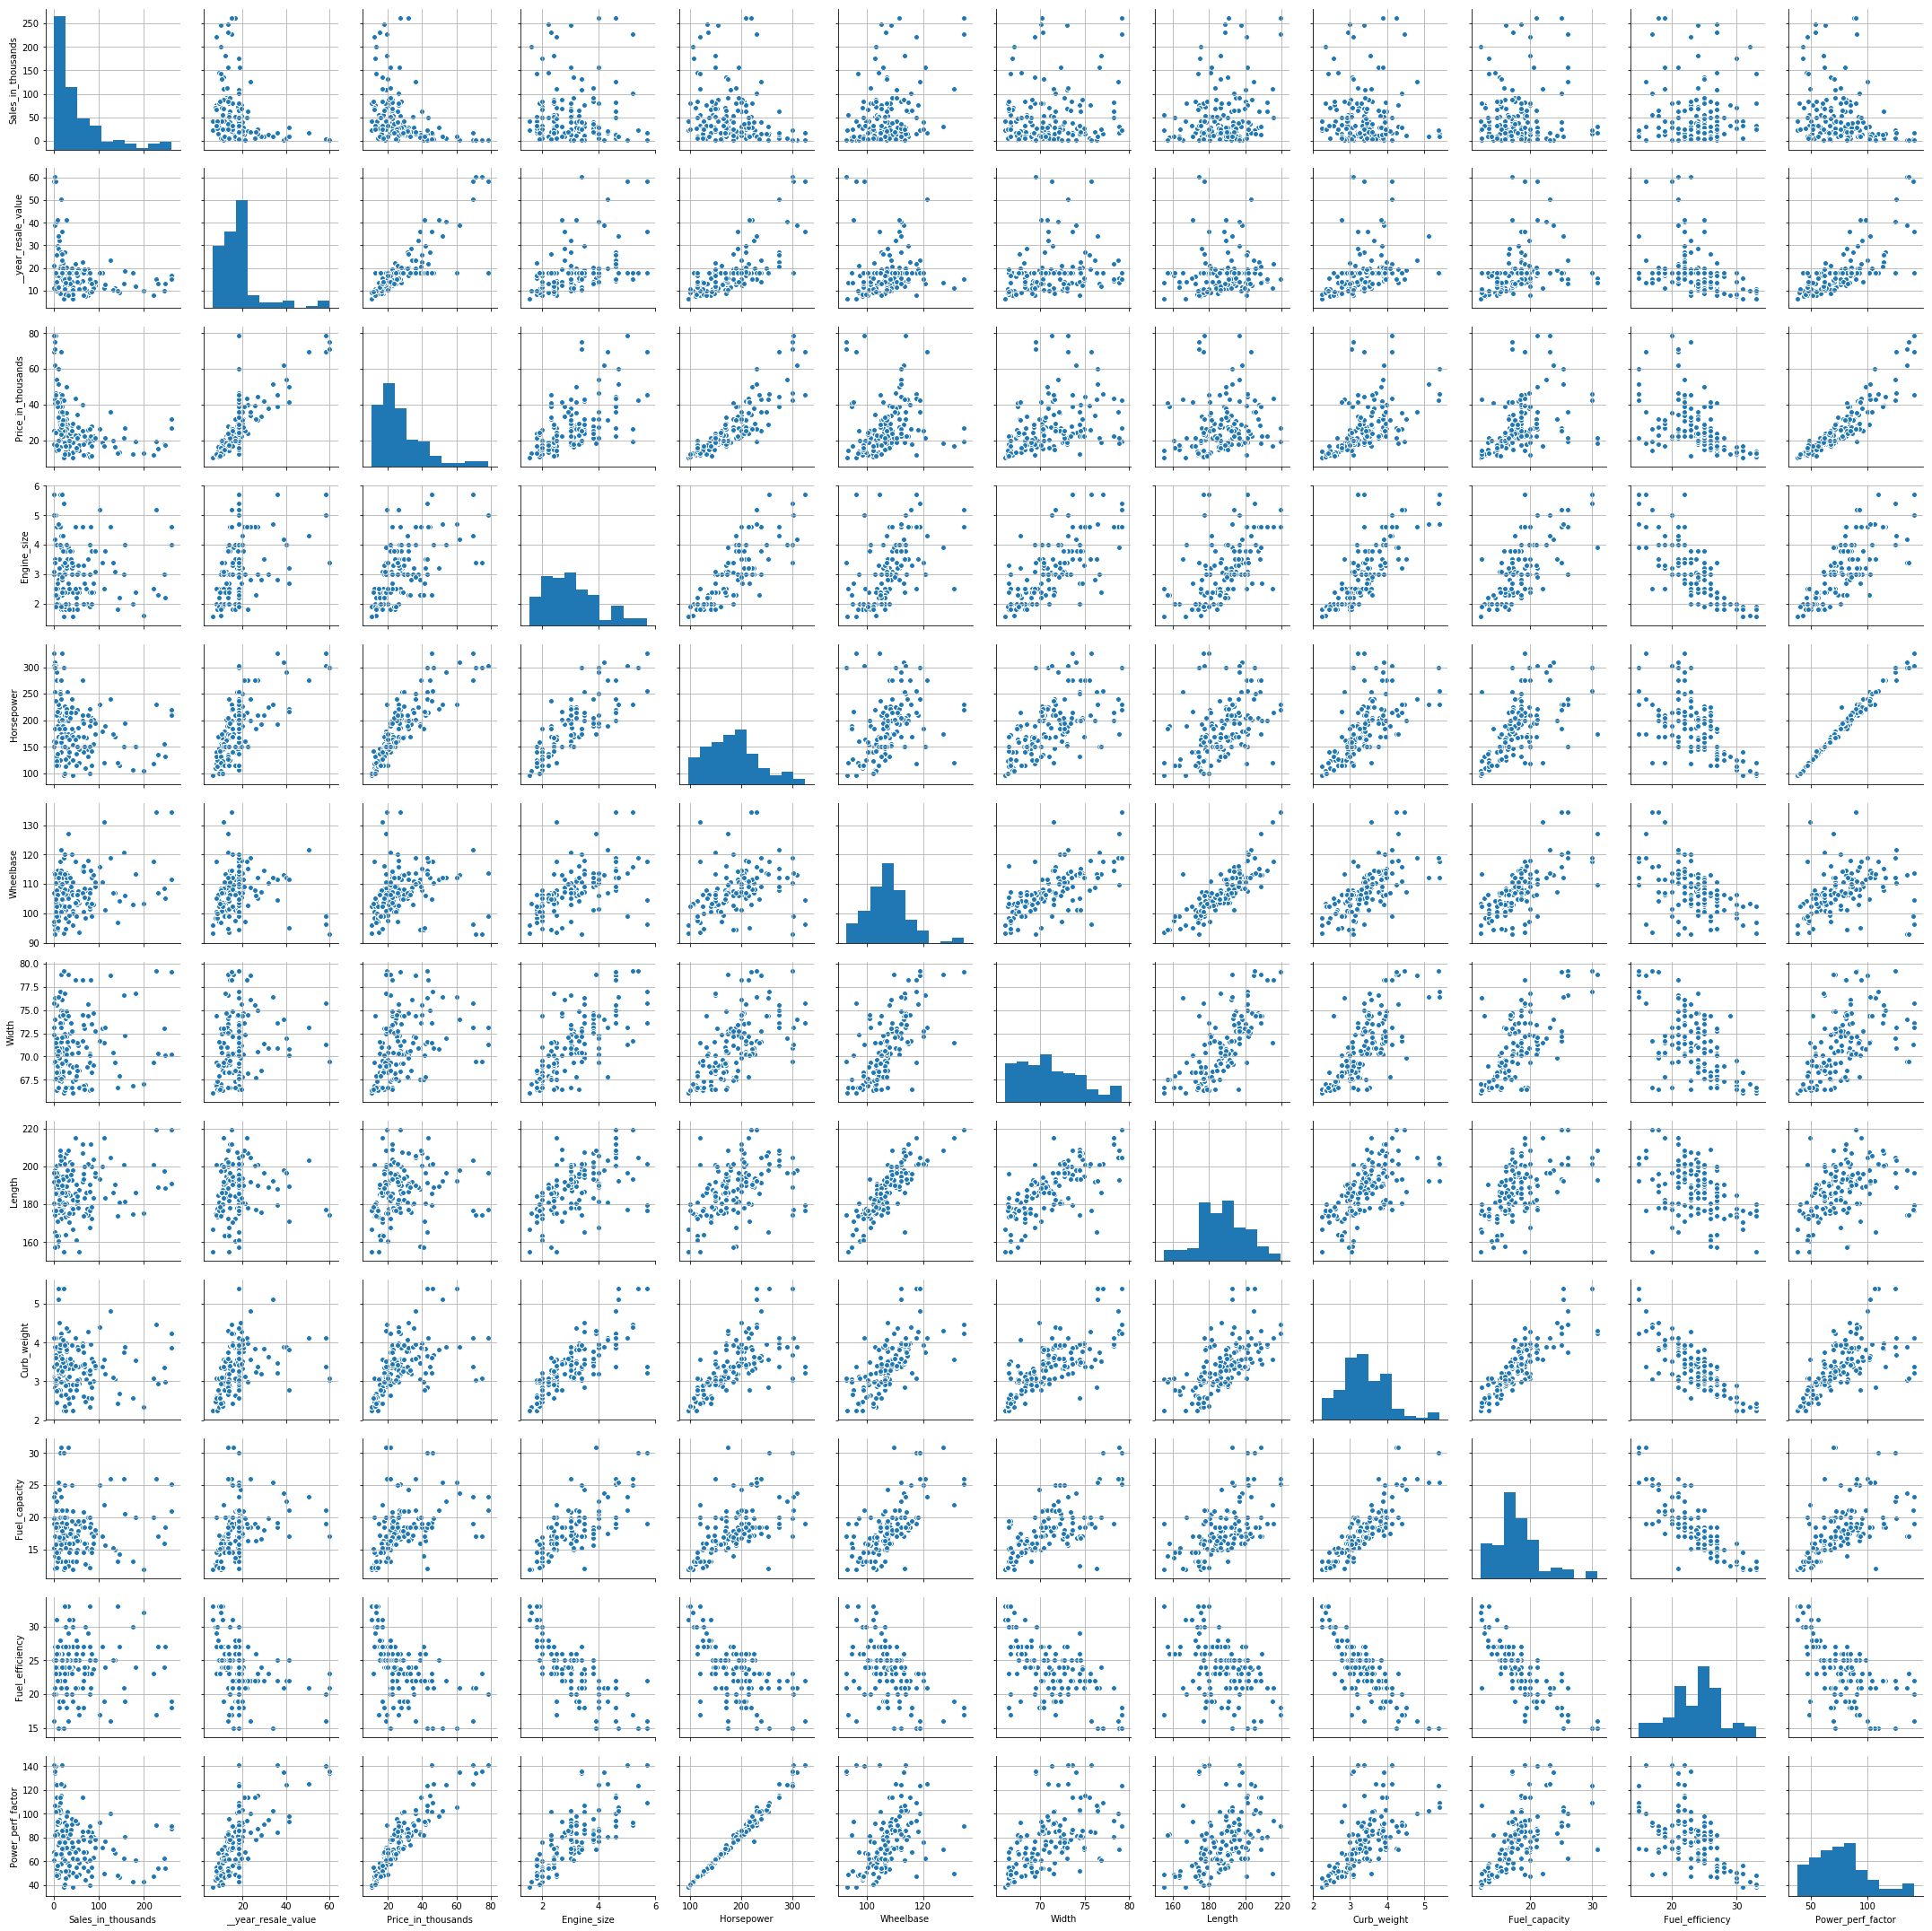

In [25]:
sns.pairplot(car_sales_num)

In [26]:
# a. Separating out Categorical and Numerical Variables
cat_list = []
num_list = []

for variable in car_sales.columns:
    if car_sales[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)


In [27]:
# 4 transformations = X, X_squared, X_sqrt, X_ln
car_sales_transform = car_sales_num[num_list].copy()
squared = (car_sales_transform**2).add_suffix("_squared")
square_root = (car_sales_transform**0.5).add_suffix("_sqrt")
natural_log = np.log(car_sales_transform+1).add_suffix("_ln")
car_sales_transform = pd.concat([car_sales_transform, squared, square_root, natural_log], axis=1)
car_sales_transform.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Price_in_thousands_ln,Engine_size_ln,Horsepower_ln,Wheelbase_ln,Width_ln,Length_ln,Curb_weight_ln,Fuel_capacity_ln,Fuel_efficiency_ln,Power_perf_factor_ln
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,3.113515,1.029619,4.948760,4.626932,4.223910,5.155601,1.291709,2.653242,3.367296,4.082275
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,3.380995,1.435085,5.420535,4.692265,4.266896,5.267343,1.507848,2.901422,3.258097,4.525811
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,3.343877,1.435085,5.420535,4.681205,4.271095,5.262690,1.497388,2.901422,3.295837,4.354779
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,3.761200,1.504077,5.351858,4.750136,4.282206,5.286245,1.578979,2.944439,3.135494,4.526016
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,3.218476,1.029619,5.017280,4.640537,4.237001,5.187386,1.385794,2.856470,3.332205,4.155403


In [28]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [29]:
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_transform, car_sales_cat], axis=1)

In [31]:
car_sales_new.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


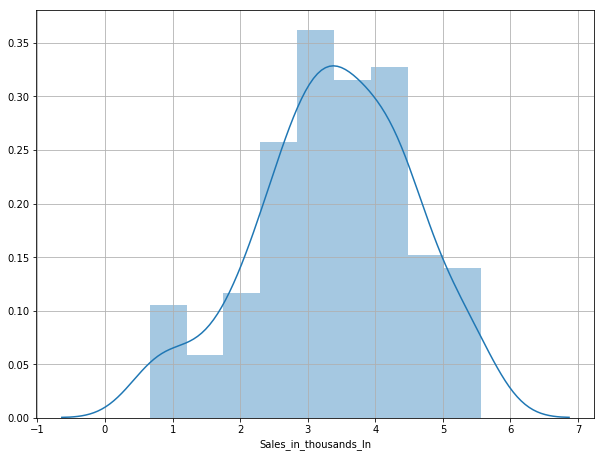

In [32]:
sns.distplot(car_sales_new.Sales_in_thousands_ln)

In [33]:
car_sales_new.drop(['Sales_in_thousands','Sales_in_thousands_squared','Sales_in_thousands_sqrt'],axis=1,inplace=True)

In [34]:
# a. Separating out Categorical and Numerical Variables
cat_list_new = []
num_list_new = []

for variable in car_sales_new.columns:
    if car_sales_new[variable].dtype.name in ['object']:
        cat_list_new.append(variable)
    else:
        num_list_new.append(variable)

In [35]:
for correl in num_list_new:
    print(correl+" "+str(car_sales_new['Sales_in_thousands_ln'].corr(car_sales_new[correl])))

__year_resale_value -0.4702386916480861
Price_in_thousands -0.5664856398663012
Engine_size -0.10952563437269115
Horsepower -0.3928938154787581
Wheelbase 0.26962650135345434
Width 0.04510407608545698
Length 0.20777839211550087
Curb_weight -0.05620838948711317
Fuel_capacity -0.017764688252155464
Fuel_efficiency 0.12803292867213883
Power_perf_factor -0.43822512474593267
__year_resale_value_squared -0.44178257015269723
Price_in_thousands_squared -0.5511762676270718
Engine_size_squared -0.11614210647893627
Horsepower_squared -0.41939135145865036
Wheelbase_squared 0.27023206386751747
Width_squared 0.048952163442268264
Length_squared 0.21016587289887936
Curb_weight_squared -0.05270114444107632
Fuel_capacity_squared -0.012919271096253045
Fuel_efficiency_squared 0.1369080942198572
Power_perf_factor_squared -0.4651394884440346
__year_resale_value_sqrt -0.4707784381117198
Price_in_thousands_sqrt -0.5574288941516409
Engine_size_sqrt -0.10578526856969868
Horsepower_sqrt -0.37638318541135135
Wheelba

In [36]:
car_sales_new.rename(columns={'Manufacturer_Mercedes-B':'Manufacturer_Mercedes'},inplace=True)

In [37]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['Sales_in_thousands_ln'] )
feature_columns

Index(['Curb_weight', 'Curb_weight_ln', 'Curb_weight_sqrt',
       'Curb_weight_squared', 'Engine_size', 'Engine_size_ln',
       'Engine_size_sqrt', 'Engine_size_squared', 'Fuel_capacity',
       'Fuel_capacity_ln', 'Fuel_capacity_sqrt', 'Fuel_capacity_squared',
       'Fuel_efficiency', 'Fuel_efficiency_ln', 'Fuel_efficiency_sqrt',
       'Fuel_efficiency_squared', 'Horsepower', 'Horsepower_ln',
       'Horsepower_sqrt', 'Horsepower_squared', 'Length', 'Length_ln',
       'Length_sqrt', 'Length_squared', 'Manufacturer_Audi',
       'Manufacturer_BMW', 'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Infiniti', 'Manufacturer_Jaguar', 'Manufacturer_Jeep',
       'Manufacturer_Lexus', 'Manufacturer_Lincoln', 'Manufacturer_Mercedes',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan

In [38]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['Sales_in_thousands_ln'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [39]:
print (len( train_X ))
print (len( test_X))

109
48


In [40]:
import statsmodels.api as sm

In [41]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [42]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     Sales_in_thousands_ln   R-squared:                       0.881
Model:                               OLS   Adj. R-squared:                  0.643
Method:                    Least Squares   F-statistic:                     3.698
Date:                   Thu, 08 Nov 2018   Prob (F-statistic):           2.35e-05
Time:                           23:02:17   Log-Likelihood:                -56.496
No. Observations:                    109   AIC:                             259.0
Df Residuals:                         36   BIC:                             455.5
Df Model:                             72                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [43]:
num_list_new2 = []
for variable in train_X.columns:
        num_list_new2.append(variable)

In [44]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

F_values, p_values  = f_regression( train_X, train_y)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\raghu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\raghu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\raghu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWar

In [45]:
for i in list(range(1,75)):
    print(num_list_new2[i],'  %.3f' %p_values[i])

Curb_weight   0.486
Curb_weight_ln   0.441
Curb_weight_sqrt   0.456
Curb_weight_squared   0.543
Engine_size   0.297
Engine_size_ln   0.302
Engine_size_sqrt   0.300
Engine_size_squared   0.290
Fuel_capacity   0.749
Fuel_capacity_ln   0.716
Fuel_capacity_sqrt   0.731
Fuel_capacity_squared   0.786
Fuel_efficiency   0.268
Fuel_efficiency_ln   0.339
Fuel_efficiency_sqrt   0.303
Fuel_efficiency_squared   0.210
Horsepower   0.000
Horsepower_ln   0.000
Horsepower_sqrt   0.000
Horsepower_squared   0.000
Length   0.027
Length_ln   0.028
Length_sqrt   0.027
Length_squared   0.027
Manufacturer_Audi   0.026
Manufacturer_BMW   0.643
Manufacturer_Buick   0.561
Manufacturer_Cadillac   0.489
Manufacturer_Chevrolet   0.373
Manufacturer_Chrysler   0.692
Manufacturer_Dodge   0.086
Manufacturer_Ford   0.000
Manufacturer_Honda   0.021
Manufacturer_Hyundai   0.677
Manufacturer_Infiniti   nan
Manufacturer_Jaguar   0.573
Manufacturer_Jeep   0.126
Manufacturer_Lexus   0.373
Manufacturer_Lincoln   0.758
Manufact

In [46]:
car_sales_new.drop(['Curb_weight','Curb_weight_ln','Curb_weight_sqrt','Length','Length_sqrt','Length_squared','Width','Width_sqrt','Width_squared','Engine_size','Engine_size_sqrt','Engine_size_squared','Fuel_capacity','Fuel_capacity_ln','Fuel_capacity_sqrt','Fuel_efficiency','Fuel_efficiency_sqrt','Fuel_efficiency_squared','Horsepower_ln','Horsepower_sqrt','Horsepower','Power_perf_factor_ln','Power_perf_factor_sqrt','Power_perf_factor','Price_in_thousands_ln','Price_in_thousands_sqrt','Price_in_thousands_squared','Wheelbase','Wheelbase_ln','Wheelbase_sqrt','__year_resale_value','__year_resale_value_ln','__year_resale_value_squared'],axis=1,inplace=True)

In [47]:
# Dropping variables on p-values
car_sales_new.drop('Manufacturer_Subaru',axis=1,inplace=True)

In [48]:
# Dropping variables on p-values
car_sales_new.drop('Manufacturer_Mercury',axis=1,inplace=True)

In [49]:
car_sales_new.drop('Manufacturer_Infiniti',axis=1,inplace=True)

In [50]:
car_sales_new.drop('Manufacturer_BMW',axis=1,inplace=True)

In [51]:
car_sales_new.drop('Manufacturer_Mitsubishi',axis=1,inplace=True)

In [52]:
car_sales_new.drop('Manufacturer_Volvo',axis=1,inplace=True)

In [53]:
car_sales_new.drop('Manufacturer_Chevrolet',axis=1,inplace=True)

In [54]:
car_sales_new.drop('Manufacturer_Volkswagen',axis=1,inplace=True)

In [55]:
car_sales_new.drop('Manufacturer_Saab',axis=1,inplace=True)

In [56]:
car_sales_new.drop('Length_ln',axis=1,inplace=True)

In [57]:
car_sales_new.drop('Manufacturer_Mercedes',axis=1,inplace=True)

In [58]:
car_sales_new.drop('Manufacturer_Pontiac',axis=1,inplace=True)

In [59]:
car_sales_new.drop('Width_ln',axis=1,inplace=True)

In [60]:
car_sales_new.drop('Manufacturer_Cadillac',axis=1,inplace=True)

In [61]:
car_sales_new.drop('Manufacturer_Buick',axis=1,inplace=True)

In [62]:
car_sales_new.drop('Manufacturer_Lincoln',axis=1,inplace=True)

In [63]:
car_sales_new.drop('Manufacturer_Jaguar',axis=1,inplace=True)

In [64]:
car_sales_new.drop('Manufacturer_Lexus',axis=1,inplace=True)

In [65]:
car_sales_new.drop('Manufacturer_Hyundai',axis=1,inplace=True)

In [66]:
car_sales_new.drop('__year_resale_value_sqrt',axis=1,inplace=True)

In [67]:
car_sales_new.drop('Manufacturer_Audi',axis=1,inplace=True)

In [68]:
car_sales_new.drop('Horsepower_squared',axis=1,inplace=True)

In [69]:
car_sales_new.drop('Power_perf_factor_squared',axis=1,inplace=True)

In [70]:
car_sales_new.drop('Manufacturer_Oldsmobile',axis=1,inplace=True)

In [71]:
car_sales_new.drop('Manufacturer_Chrysler',axis=1,inplace=True)

In [72]:
car_sales_new.drop('Manufacturer_Saturn',axis=1,inplace=True)

In [73]:
car_sales_new.drop('Manufacturer_Porsche',axis=1,inplace=True)

In [74]:
car_sales_new.drop('Curb_weight_squared',axis=1,inplace=True)

In [75]:
car_sales_new.drop('Fuel_capacity_squared',axis=1,inplace=True)

In [76]:
car_sales_new.drop('Manufacturer_Toyota',axis=1,inplace=True)

In [77]:
car_sales_new.drop('Manufacturer_Plymouth',axis=1,inplace=True)

In [78]:
car_sales_new.drop('Manufacturer_Dodge',axis=1,inplace=True)

In [79]:
car_sales_new.drop('Manufacturer_Nissan',axis=1,inplace=True)

In [80]:
car_sales_new.drop('Manufacturer_Jeep',axis=1,inplace=True)

In [81]:
car_sales_new.drop('Fuel_efficiency_ln',axis=1,inplace=True)

In [82]:
car_sales_new.drop('Engine_size_ln',axis=1,inplace=True)

In [83]:
car_sales_new.drop('Vehicle_type_Passenger',axis=1,inplace=True)

In [84]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['Sales_in_thousands_ln'] )


In [85]:
import statsmodels.api as sm

In [86]:
train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['Sales_in_thousands_ln'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [87]:
print (len( train_X ))
print (len( test_X))

109
48


In [88]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [89]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     Sales_in_thousands_ln   R-squared:                       0.598
Model:                               OLS   Adj. R-squared:                  0.583
Method:                    Least Squares   F-statistic:                     38.71
Date:                   Thu, 08 Nov 2018   Prob (F-statistic):           8.25e-20
Time:                           23:06:01   Log-Likelihood:                -122.77
No. Observations:                    109   AIC:                             255.5
Df Residuals:                        104   BIC:                             269.0
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [90]:
lm.pvalues.round(4).sort_values(ascending=False)

Manufacturer_Honda    0.0101
Manufacturer_Ford     0.0004
const                 0.0001
Wheelbase_squared     0.0000
Price_in_thousands    0.0000
dtype: float64

In [91]:
all_columns = "+".join(car_sales_new.columns.difference( ['Sales_in_thousands_ln'] ))
# print (all_columns)
my_formula = "Sales_in_thousands_ln~" + all_columns
print (my_formula)

Sales_in_thousands_ln~Manufacturer_Ford+Manufacturer_Honda+Price_in_thousands+Wheelbase_squared


In [92]:
import statsmodels as sm

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [94]:
%%capture
#gather features
# features = "+".join(car_sales.columns - ['Sales_in_thousands_ln'])

# get y and X dataframes based on this regression
y, X = dmatrices(formula_like=my_formula,data=car_sales_new, return_type='dataframe')


In [95]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [96]:
vif.round(3)

,VIF Factor,features
0,53.921,Intercept
1,1.065,Manufacturer_Ford
2,1.013,Manufacturer_Honda
3,1.048,Price_in_thousands
4,1.060,Wheelbase_squared


In [100]:
train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['Sales_in_thousands_ln'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [101]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
linreg.coef_

array([ 9.63232174e-01,  1.44628481e+00, -5.23666715e-02,  2.35565440e-04])

In [103]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print (rmse_t)
print (metrics.r2_score( train_y, y_pred_t ))

0.7463166821785171
0.5981793909725626


In [104]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print (rmse)
print (metrics.r2_score( test_y, y_pred ))

0.991455087884556
0.1110929235253374


In [105]:
residuals = train_y - y_pred_t

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


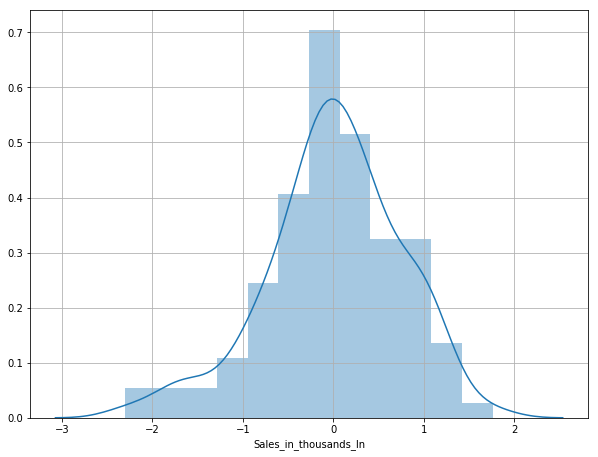

In [106]:
sns.distplot( residuals )

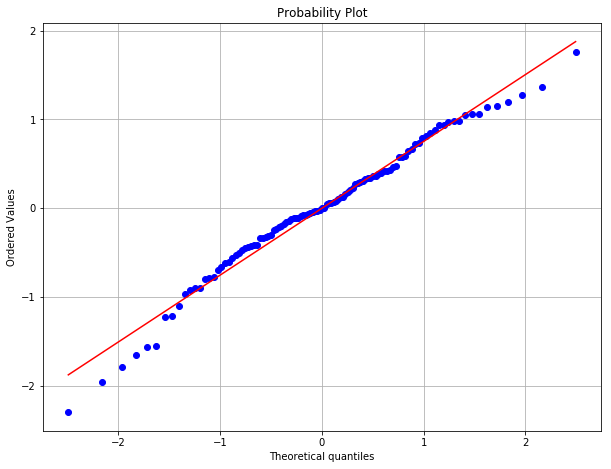

In [107]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


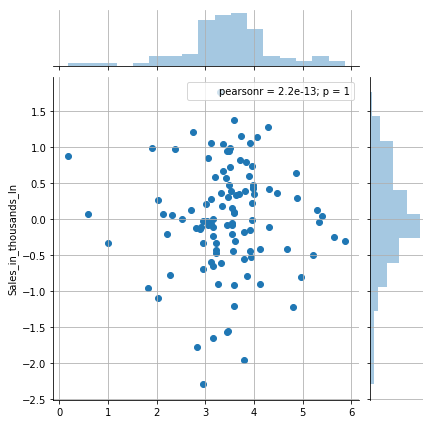

In [108]:
sns.jointplot(y_pred_t,residuals)